In [ ]:
import pickle
import os

mu_identifiers = {
    'mu=0.3': '3',
    'mu=0.6': '6',
    'mu=0.9': '9',
    'mu=1.0': '1_one',
    'mu=0.7': '7',
    'mu=0.5': '5'
}

results_mu = {}

for label, identifier in mu_identifiers.items():
    file_name = f'results_mu_{identifier}.pkl'
    file_path = os.path.join('/content', file_name)

    with open(file_path, 'rb') as f:
       results_mu[label] = pickle.load(f)
       print(f"Loaded {file_name} as {label}")


Loaded results_mu_3.pkl as mu=0.3
Loaded results_mu_6.pkl as mu=0.6
Loaded results_mu_9.pkl as mu=0.9
Loaded results_mu_1_one.pkl as mu=1.0
Loaded results_mu_7.pkl as mu=0.7
Loaded results_mu_5.pkl as mu=0.5


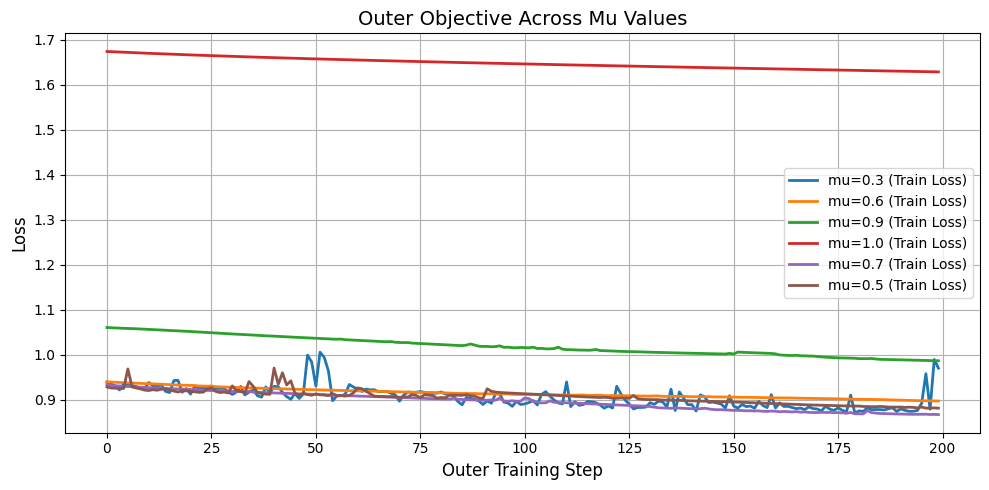

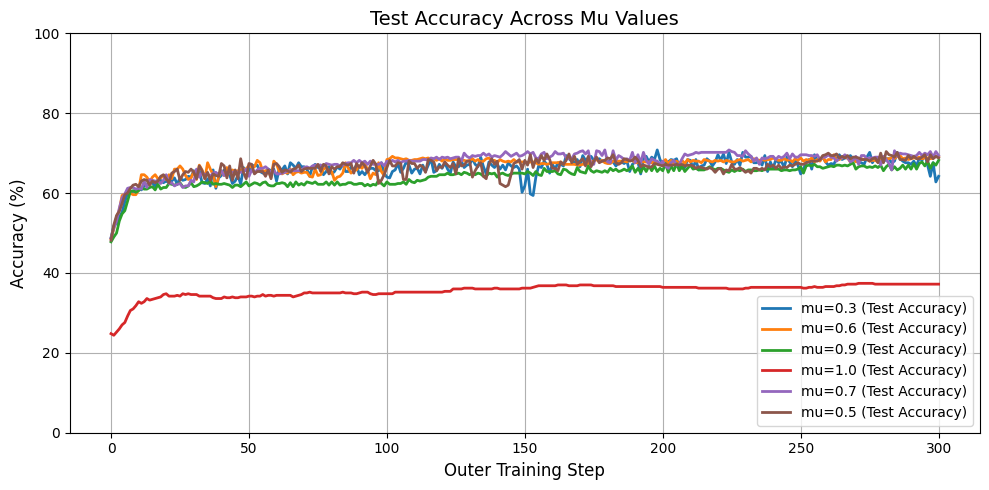

In [ ]:
import matplotlib.pyplot as plt
t = range(0, 301, 1)

# Plot 1: Outer Objective (Training Losses)
plt.figure(figsize=(10, 5))
for name, result in results_mu.items():
    train_losses = result['train_losses'][-200:]  # Extract last 200 train losses
    plt.plot(train_losses, label=f"{name} (Train Loss)", linewidth=2)

plt.xlabel("Outer Training Step", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Outer Objective Across Mu Values", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Test Accuracy
plt.figure(figsize=(10, 5))
for name, result in results_mu.items():
    test_acc = [r[-1] for r in result['inner_test_accs']]  # Extract test accuracy
    plt.plot(t, test_acc, label=f"{name} (Test Accuracy)", linewidth=2)

plt.xlabel("Outer Training Step", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Test Accuracy Across Mu Values", fontsize=14)
plt.ylim(0, 100)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


I have run the exerminent in pieces because of the RAM issue, combined them and obtained the curves for both accuracies.

According to the graph, accuracies starts improving from 0.3 till 0.7, adn maximum average test accuracy at 0.5 is 68.2 which is highest. And generally 0.5 is most preffered value.

Observe the curves for higher value of mu, they don't show much variations, quite linear like.

**High mu**: Faster convergence, increased smoothing, better at overcoming local minima, but If **mu is too high**, it can lead to overshooting the optimal solution, where the updates are too aggressive and cause the optimizer to miss the optimal point.

**Low mu**:Increased stability, slower convergence, more precise updates, but **Too low a value of mu** can cause the optimizer to progress very slowly, potentially getting stuck in local minima or requiring a much longer time to find the global minimum.

**Also observe the curves for Learned Activation functions especially for higher mu**